/Users/siddhimali/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/10


/Users/siddhimali/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.0000e+00 - loss: 0.6931
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.6926
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.6921
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.6916
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.6911
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.6907
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.6902
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.6897
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.6892
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.6887


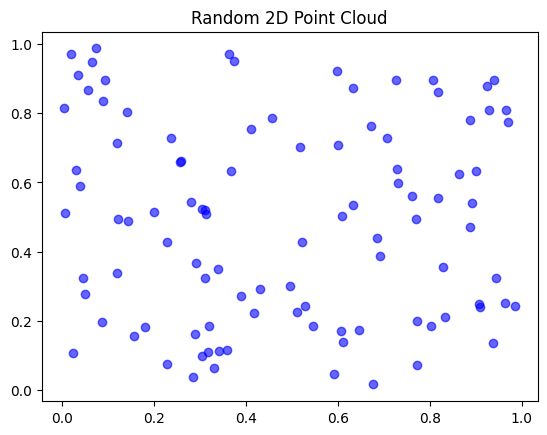

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gtda.homology import VietorisRipsPersistence
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Generate a random point cloud (100 points in 2D space)
np.random.seed(42)
num_points = 100
point_cloud = np.random.rand(num_points, 2)

# Compute persistent homology using Vietoris-Rips complex
VR = VietorisRipsPersistence(homology_dimensions=[0, 1])
persistence_diagram = VR.fit_transform([point_cloud])

# Flatten the persistence diagram into a feature vector
topological_features = persistence_diagram.reshape(1, -1)  # Convert to 1D feature vector

# Normalize features
scaler = StandardScaler()
topological_features = scaler.fit_transform(topological_features)

# Create a simple neural network using topological features
model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(topological_features.shape[1],)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Binary classification example
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Generate dummy labels (for demonstration)
labels = np.random.randint(0, 2, size=(1,))

# Train the model (dummy training for demonstration)
model.fit(topological_features, labels, epochs=10, verbose=1)

# Plot the original point cloud
plt.scatter(point_cloud[:, 0], point_cloud[:, 1], c="blue", alpha=0.6)
plt.title("Random 2D Point Cloud")
plt.show()
